In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LogLocator
from matplotlib.font_manager import FontProperties
from pathlib import Path
import matplotlib as mpl

methods = ["precise_1", "heuristic_1", "precise_2", "heuristic_2"]
method_index = 0
method_name = methods[method_index]

solvers = ["exact_poly_solver", "gurobi", "dwave_LeapHybridSampler", "dwave_DWaveSampler"]
solver_name = solvers[0]

graphs = ["clique", "cycle", "star", "chain", "random", "tree"]

classical_methods = ["dynamic_programming", "graph_aware_dynamic_programming", "greedy", "graph_aware_greedy"]

fpath = Path(mpl.get_data_path(), "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf")
custom_font = FontProperties(fname=fpath, size=16)

def read_json_files(path):
    results = []
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            with open(path + filename) as f:
                results.append(json.load(f))
    return results

def chart_data(results, graph_type):
    result = []
    for data in results:
        graph_key = list(data.keys())[0]
        graph_data = data[graph_key]
        
        try:
            scaler = graph_data["dynamic_programming_cost"]
        except:
            scaler = graph_data["optimal_cost"]
            
        if scaler == 0:
            print(f"Graph {graph_key} and {graph_type}.")
            scaler = graph_data["graph_aware_dynamic_programming_cost"]
        
        if method_index == 0:
            cost_values = {
                "Quantum": graph_data["cost"],
                #"Dynamic Programming Cost": graph_data["dynamic_programming_cost"],
                "DP": graph_data["graph_aware_dynamic_programming_cost"],
                #"Greedy Cost": graph_data["greedy_cost"],
                "Greedy": graph_data["graph_aware_greedy_cost"]
            }
        elif method_index == 1:
            cost_values = {
                "HUBO model": graph_data["cost"],
                #"Dynamic Programming Cost": graph_data["dynamic_programming_cost"],
                #"Greedy Cost": graph_data["greedy_cost"],
                "Graph-Greedy": graph_data["graph_aware_greedy_cost"],
                "Graph-DP": graph_data["graph_aware_dynamic_programming_cost"],
            }
        
        for key in cost_values.keys():
            cost_values[key] = cost_values[key] / scaler
        
        yticks = np.logspace(np.log10(1), np.log10(max(cost_values.values())), num=5).tolist()
        yticks = [round(x, 4) for x in yticks]
        yticks = sorted(list(set(yticks)))
        
        if len(yticks) > 1:
            result.append({graph_key: cost_values, "yticks": yticks, "graph_type": graph_type})
        else:
            print(f"Graph {graph_key} is not included in the chart.")
            print(f"costvalues: {cost_values}")
            print(f"graph type: {graph_type}")
    
    return result


def create_bar_charts_side_by_side(data_list):
    num_charts = len(data_list)
    
    if num_charts == 1:
        fig_siz = (2, 1.5)
    elif num_charts == 2:
        fig_siz = (4, 3)
    elif num_charts == 3:
        fig_siz = (6, 4.5)
    elif num_charts == 4:
        fig_siz = (6, 3)
    elif num_charts == 5:
        fig_siz = (10, 7.5)
    else:
        fig_siz = (22, 3)
    
    fig, axes = plt.subplots(1, num_charts, figsize=fig_siz)
    if num_charts == 1:
        axes = [axes]
    for i, (data, ax) in enumerate(zip(data_list, axes)):
        smoke_gray = '#e0e4dd'
        ax.set_facecolor(smoke_gray)
        graph_key = list(data.keys())[0]
        cost_values = data[graph_key]
        graph_type = data["graph_type"]
        yticks = data["yticks"]
        
        if method_index == 0:
            colors = ["#6a5acd", "#808000", "#d95f02"]
        elif method_index == 1:
            colors = ['#9467bd', '#17becf', '#bcbd22']
        elif method_index == 2:
            colors = ['#d62728', '#1f77b4', '#ffbb78']
        elif method_index == 3:
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            
        bars = ax.bar(cost_values.keys(), cost_values.values(), color=colors, width=0.9)
        
        #graph_title = #graph_key.replace("Graph", graph_type.capitalize()).replace(" with ", ":").replace(" and ", ",").replace(" nodes", "").replace(" edges", "")
        # graph title is the graph key with graph type capitalized and - and number of nodes
        #Extract number of nodes from graph key
        nnodes = graph_key.split(" ")[-5]
        graph_title = graph_type.capitalize() + "-" + nnodes
        ax.set_title(f'{graph_title}', font=fpath, fontsize=16)
        ax.set_xticklabels([]) #cost_values.keys(), rotation=45, ha='right', font=fpath, fontsize=12)
        ax.set_xticks([])
        #plt.yticks(fontsize=16)
        
        ax.yaxis.set_major_locator(LogLocator(base=10.0))
        ax.set_yticks(yticks)
        # Make y ticks bigger
        ax.yaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        # Don't show x-axis labels
        
        loww = (yticks[1] - 1)/2
        ax.set_ylim([yticks[0] - loww, yticks[-1] + loww])
        
        if i == 0:
            ax.set_ylabel('Scaled cost', font=fpath, fontsize=20)
            ax.legend(bars, cost_values.keys(), prop=custom_font, frameon=False, bbox_to_anchor=(0.0, 1.1, 10, 0.0), loc="lower left", mode="expand", borderaxespad=0, ncol=1)
        
            
    
    plt.tight_layout()
    plt.show()

Graph Graph with 3 nodes and 3 edges is not included in the chart.
costvalues: {'Quantum': 1.0, 'DP': 1.0, 'Greedy': 1.0}
graph type: clique
Graph Graph with 3 nodes and 3 edges is not included in the chart.
costvalues: {'Quantum': 1.0, 'DP': 1.0, 'Greedy': 1.0}
graph type: cycle
Graph Graph with 4 nodes and 3 edges is not included in the chart.
costvalues: {'Quantum': 1.0000000000000002, 'DP': 1.0, 'Greedy': 1.0000000000000002}
graph type: star
Graph Graph with 5 nodes and 4 edges is not included in the chart.
costvalues: {'Quantum': 1.0000040588404762, 'DP': 1.000004058840476, 'Greedy': 1.0000040588404762}
graph type: star
Graph Graph with 5 nodes and 4 edges is not included in the chart.
costvalues: {'Quantum': 1.0, 'DP': 1.0, 'Greedy': 1.0}
graph type: random


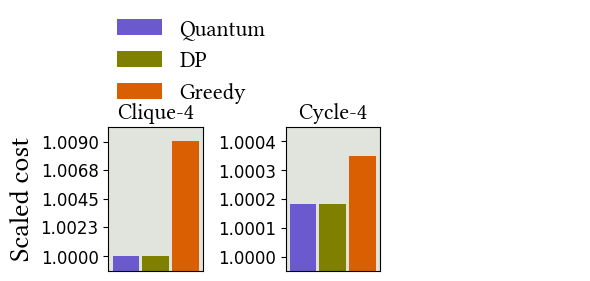

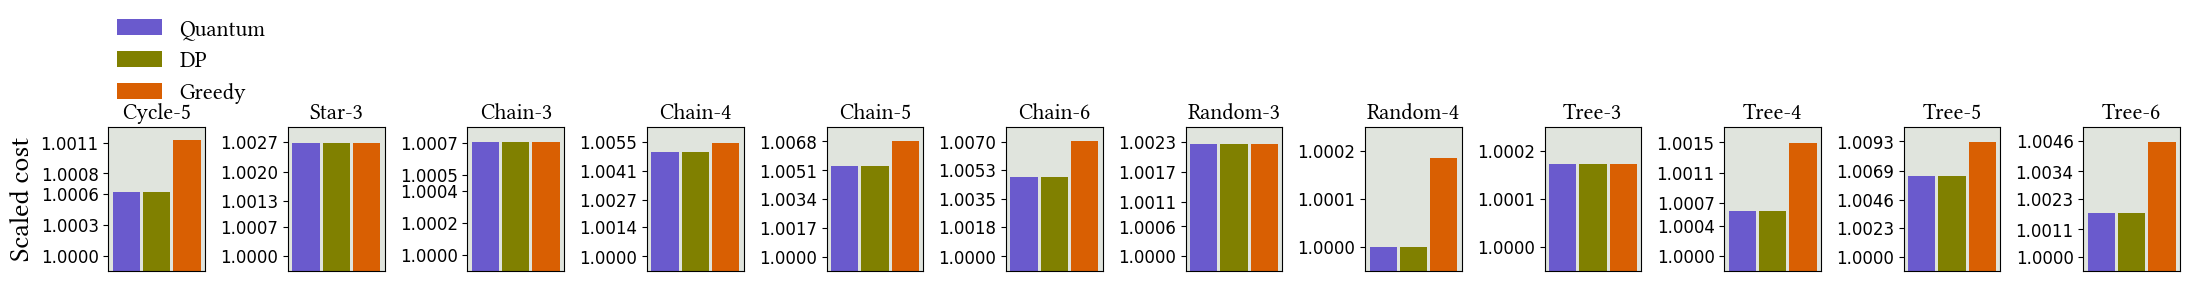

In [2]:
data = []
for graph in graphs:
    path = "..//results//" + method_name + "//" + solver_name + "//" + graph + "//"
    c_data = chart_data(read_json_files(path), graph)
    
    if method_index > 0:
        previous_method = methods[method_index - 1]
        previous_path = "..//results//" + previous_method + "//" + solver_name + "//" + graph + "//"
        c_data_prev = chart_data(read_json_files(previous_path), graph)
        
        # Remove graphs that are in both methods
        for i in range(len(c_data)):
            if list(c_data[i].keys())[0] in [list(x.keys())[0] for x in c_data_prev]:
                c_data[i] = None
    
    for d in c_data:
        if d is not None:
            data.append(d)
    
#create_bar_charts_side_by_side(data)

# Divide into two parts
data1 = data[: len(data) // 2]
data2 = data[len(data) // 2:]
create_bar_charts_side_by_side(data1)
create_bar_charts_side_by_side(data2)